In [209]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def lineplot_small_multiples(histories, title = None, sub_title_func = None, width = 2):
    #
    n_plots = len(histories)
    options = {'figsize': [20,35/width]}
    fig, ax = plt.subplots(int(np.ceil(n_plots/width)), width, **options)
    if title is not None:
        fig.suptitle(title)
    for i in range(int(np.ceil(n_plots/width))*width):
        x = int(i%width)
        y = int(np.floor(i/width))
        if i < n_plots:
            history = histories[i]
            for key, vals in history.items():
                ax[y,x].plot(range(len(vals)), vals, label=key)
                if sub_title_func is not None:
                    ax[y,x].set_title(sub_title_func(i))
            if len(history.keys()) > 1:
                ax[y,x].legend()
        else:
            fig.delaxes(ax[y,x])

class LinearModel(tf.keras.Model):
    
    def __init__(self):
        super(LinearModel, self).__init__()
        self.dense1 = layers.Dense(1, activation = tf.nn.relu)
        
    def call(self, inputs, training = False):
        if isinstance(inputs, pd.DataFrame):
            inputs = inputs.values
        return self.dense1(inputs)
    
def compile_linear_model(lr = .001):
    model = LinearModel()
    model.compile(tf.keras.optimizers.RMSprop(lr), loss=tf.losses.mean_squared_error)
    return model

In [27]:
housing = pd.read_csv('housing.csv')

train = housing.sample(frac = .7)
test = housing.drop(train.index)

def regularize(d):
    xtrain = train.drop('medv', axis = 1)
    return (d - xtrain.mean())/xtrain.std()

def get_xy(data):
    y = data.medv
    x = regularize(data.drop('medv',axis =1))
    return x, y

xtrain, ytrain = get_xy(train)
xtest, ytest = get_xy(test)

Check validation error for the training set with multiple epoch to get the best learning rate

In [140]:
loss_hists = []
learning_rates = [.0001*10**k for k in range(5)]
epochs = 200
val_size = .2
fit_model = lambda m, vs: m.fit(xtrain.values, 
                                ytrain.values, 
                                epochs = epochs, 
                                validation_split = vs, 
                                verbose = 1)
for  lr in learning_rates:
    model = compile_linear_model(lr)
    hist = fit_model(model, val_size)
    loss_hists.append(hist.history)

Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 1s 5ms/sample - loss: 528.9330 - val_loss: 693.1658
Epoch 2/200
283/283 [==============================] - 0s 39us/sample - loss: 528.7965 - val_loss: 692.9588
Epoch 3/200
283/283 [==============================] - 0s 42us/sample - loss: 528.6867 - val_loss: 692.7694
Epoch 4/200
283/283 [==============================] - 0s 42us/sample - loss: 528.5844 - val_loss: 692.5949
Epoch 5/200
283/283 [==============================] - 0s 39us/sample - loss: 528.4878 - val_loss: 692.4169
Epoch 6/200
283/283 [==============================] - 0s 42us/sample - loss: 528.3873 - val_loss: 692.2324
Epoch 7/200
283/283 [==============================] - 0s 46us/sample - loss: 528.2868 - val_loss: 692.0513
Epoch 8/200
283/283 [==============================] - 0s 42us/sample - loss: 528.1855 - val_loss: 691.8616
Epoch 9/200
283/283 [==============================] - 0s 39us/sample - loss: 528.0855 - val

Epoch 76/200
283/283 [==============================] - 0s 35us/sample - loss: 520.4941 - val_loss: 678.6358
Epoch 77/200
283/283 [==============================] - 0s 42us/sample - loss: 520.3596 - val_loss: 678.4125
Epoch 78/200
283/283 [==============================] - 0s 42us/sample - loss: 520.2259 - val_loss: 678.2031
Epoch 79/200
283/283 [==============================] - 0s 42us/sample - loss: 520.0942 - val_loss: 677.9869
Epoch 80/200
283/283 [==============================] - 0s 35us/sample - loss: 519.9641 - val_loss: 677.7775
Epoch 81/200
283/283 [==============================] - 0s 35us/sample - loss: 519.8308 - val_loss: 677.5577
Epoch 82/200
283/283 [==============================] - 0s 42us/sample - loss: 519.6985 - val_loss: 677.3471
Epoch 83/200
283/283 [==============================] - 0s 35us/sample - loss: 519.5662 - val_loss: 677.1354
Epoch 84/200
283/283 [==============================] - 0s 35us/sample - loss: 519.4375 - val_loss: 676.9240
Epoch 85/200
283/28

283/283 [==============================] - 0s 39us/sample - loss: 509.8541 - val_loss: 662.2590
Epoch 151/200
283/283 [==============================] - 0s 39us/sample - loss: 509.7004 - val_loss: 662.0308
Epoch 152/200
283/283 [==============================] - 0s 39us/sample - loss: 509.5437 - val_loss: 661.8068
Epoch 153/200
283/283 [==============================] - 0s 39us/sample - loss: 509.3880 - val_loss: 661.5710
Epoch 154/200
283/283 [==============================] - 0s 39us/sample - loss: 509.2284 - val_loss: 661.3378
Epoch 155/200
283/283 [==============================] - 0s 39us/sample - loss: 509.0714 - val_loss: 661.1146
Epoch 156/200
283/283 [==============================] - 0s 35us/sample - loss: 508.9159 - val_loss: 660.8858
Epoch 157/200
283/283 [==============================] - 0s 35us/sample - loss: 508.7562 - val_loss: 660.6585
Epoch 158/200
283/283 [==============================] - 0s 42us/sample - loss: 508.5979 - val_loss: 660.4314
Epoch 159/200
283/283 [=

283/283 [==============================] - 0s 42us/sample - loss: 498.3592 - val_loss: 642.0768
Epoch 25/200
283/283 [==============================] - 0s 39us/sample - loss: 496.7780 - val_loss: 639.5628
Epoch 26/200
283/283 [==============================] - 0s 42us/sample - loss: 495.1723 - val_loss: 637.2067
Epoch 27/200
283/283 [==============================] - 0s 39us/sample - loss: 493.6051 - val_loss: 634.8555
Epoch 28/200
283/283 [==============================] - 0s 42us/sample - loss: 492.0734 - val_loss: 632.5240
Epoch 29/200
283/283 [==============================] - 0s 39us/sample - loss: 490.4865 - val_loss: 630.0708
Epoch 30/200
283/283 [==============================] - 0s 39us/sample - loss: 488.8913 - val_loss: 627.7250
Epoch 31/200
283/283 [==============================] - 0s 35us/sample - loss: 487.3064 - val_loss: 625.3054
Epoch 32/200
283/283 [==============================] - 0s 46us/sample - loss: 485.7336 - val_loss: 623.0155
Epoch 33/200
283/283 [==========

283/283 [==============================] - 0s 42us/sample - loss: 389.7868 - val_loss: 482.3874
Epoch 100/200
283/283 [==============================] - 0s 42us/sample - loss: 388.5385 - val_loss: 480.5482
Epoch 101/200
283/283 [==============================] - 0s 39us/sample - loss: 387.2608 - val_loss: 478.6367
Epoch 102/200
283/283 [==============================] - 0s 42us/sample - loss: 385.9830 - val_loss: 476.8519
Epoch 103/200
283/283 [==============================] - 0s 39us/sample - loss: 384.7257 - val_loss: 474.9804
Epoch 104/200
283/283 [==============================] - 0s 42us/sample - loss: 383.5158 - val_loss: 473.3429
Epoch 105/200
283/283 [==============================] - 0s 42us/sample - loss: 382.3392 - val_loss: 471.5684
Epoch 106/200
283/283 [==============================] - 0s 35us/sample - loss: 381.1137 - val_loss: 469.8110
Epoch 107/200
283/283 [==============================] - 0s 39us/sample - loss: 379.8867 - val_loss: 468.0179
Epoch 108/200
283/283 [=

283/283 [==============================] - 0s 42us/sample - loss: 309.2026 - val_loss: 364.6053
Epoch 174/200
283/283 [==============================] - 0s 42us/sample - loss: 308.3242 - val_loss: 363.3435
Epoch 175/200
283/283 [==============================] - 0s 39us/sample - loss: 307.4331 - val_loss: 362.0389
Epoch 176/200
283/283 [==============================] - 0s 35us/sample - loss: 306.5188 - val_loss: 360.6686
Epoch 177/200
283/283 [==============================] - 0s 39us/sample - loss: 305.5905 - val_loss: 359.3263
Epoch 178/200
283/283 [==============================] - 0s 39us/sample - loss: 304.6893 - val_loss: 358.0310
Epoch 179/200
283/283 [==============================] - 0s 35us/sample - loss: 303.8038 - val_loss: 356.7465
Epoch 180/200
283/283 [==============================] - 0s 39us/sample - loss: 302.9289 - val_loss: 355.4612
Epoch 181/200
283/283 [==============================] - 0s 39us/sample - loss: 302.0686 - val_loss: 354.2468
Epoch 182/200
283/283 [=

283/283 [==============================] - 0s 42us/sample - loss: 332.7795 - val_loss: 453.2645
Epoch 48/200
283/283 [==============================] - 0s 42us/sample - loss: 329.7046 - val_loss: 449.5518
Epoch 49/200
283/283 [==============================] - 0s 42us/sample - loss: 326.7437 - val_loss: 445.5138
Epoch 50/200
283/283 [==============================] - 0s 39us/sample - loss: 323.8470 - val_loss: 441.5773
Epoch 51/200
283/283 [==============================] - 0s 42us/sample - loss: 321.0248 - val_loss: 437.6237
Epoch 52/200
283/283 [==============================] - 0s 42us/sample - loss: 318.1461 - val_loss: 433.6708
Epoch 53/200
283/283 [==============================] - 0s 42us/sample - loss: 315.3116 - val_loss: 429.4559
Epoch 54/200
283/283 [==============================] - ETA: 0s - loss: 444.116 - 0s 39us/sample - loss: 312.6056 - val_loss: 425.5038
Epoch 55/200
283/283 [==============================] - 0s 39us/sample - loss: 309.8344 - val_loss: 421.3067
Epoch 

Epoch 122/200
283/283 [==============================] - 0s 42us/sample - loss: 172.5817 - val_loss: 242.7875
Epoch 123/200
283/283 [==============================] - 0s 39us/sample - loss: 170.9177 - val_loss: 240.9936
Epoch 124/200
283/283 [==============================] - 0s 35us/sample - loss: 169.0396 - val_loss: 238.7288
Epoch 125/200
283/283 [==============================] - 0s 39us/sample - loss: 166.9944 - val_loss: 236.5408
Epoch 126/200
283/283 [==============================] - 0s 39us/sample - loss: 165.1759 - val_loss: 234.6460
Epoch 127/200
283/283 [==============================] - 0s 35us/sample - loss: 163.3147 - val_loss: 232.0266
Epoch 128/200
283/283 [==============================] - 0s 39us/sample - loss: 161.3615 - val_loss: 229.2052
Epoch 129/200
283/283 [==============================] - 0s 39us/sample - loss: 159.3756 - val_loss: 226.4345
Epoch 130/200
283/283 [==============================] - 0s 39us/sample - loss: 157.3395 - val_loss: 223.7538
Epoch 131/

283/283 [==============================] - 0s 42us/sample - loss: 56.8911 - val_loss: 60.3094
Epoch 198/200
283/283 [==============================] - 0s 46us/sample - loss: 55.9826 - val_loss: 58.9332
Epoch 199/200
283/283 [==============================] - 0s 42us/sample - loss: 55.0173 - val_loss: 57.9068
Epoch 200/200
283/283 [==============================] - 0s 42us/sample - loss: 54.0796 - val_loss: 56.9336
Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 1s 5ms/sample - loss: 406.8787 - val_loss: 367.9884
Epoch 2/200
283/283 [==============================] - 0s 42us/sample - loss: 274.8846 - val_loss: 272.2690
Epoch 3/200
283/283 [==============================] - 0s 39us/sample - loss: 225.1008 - val_loss: 214.9500
Epoch 4/200
283/283 [==============================] - 0s 42us/sample - loss: 193.0997 - val_loss: 175.8293
Epoch 5/200
283/283 [==============================] - 0s 42us/sample - loss: 169.7906 - val_loss: 148.099

283/283 [==============================] - 0s 39us/sample - loss: 23.1384 - val_loss: 20.6513
Epoch 74/200
283/283 [==============================] - 0s 39us/sample - loss: 23.0283 - val_loss: 20.6638
Epoch 75/200
283/283 [==============================] - 0s 39us/sample - loss: 22.6749 - val_loss: 20.4908
Epoch 76/200
283/283 [==============================] - 0s 39us/sample - loss: 23.5730 - val_loss: 20.5844
Epoch 77/200
283/283 [==============================] - 0s 35us/sample - loss: 22.7540 - val_loss: 21.3451
Epoch 78/200
283/283 [==============================] - 0s 39us/sample - loss: 22.8513 - val_loss: 20.7986
Epoch 79/200
283/283 [==============================] - 0s 42us/sample - loss: 23.1718 - val_loss: 21.1175
Epoch 80/200
283/283 [==============================] - 0s 39us/sample - loss: 23.1960 - val_loss: 20.7546
Epoch 81/200
283/283 [==============================] - 0s 35us/sample - loss: 23.0851 - val_loss: 20.8184
Epoch 82/200
283/283 [============================

283/283 [==============================] - 0s 42us/sample - loss: 23.6791 - val_loss: 20.2248
Epoch 150/200
283/283 [==============================] - 0s 39us/sample - loss: 22.8387 - val_loss: 20.8094
Epoch 151/200
283/283 [==============================] - 0s 42us/sample - loss: 22.8892 - val_loss: 20.1746
Epoch 152/200
283/283 [==============================] - 0s 35us/sample - loss: 22.7456 - val_loss: 20.1051
Epoch 153/200
283/283 [==============================] - 0s 39us/sample - loss: 23.2846 - val_loss: 20.5323
Epoch 154/200
283/283 [==============================] - 0s 39us/sample - loss: 23.2560 - val_loss: 21.5817
Epoch 155/200
283/283 [==============================] - 0s 39us/sample - loss: 23.1854 - val_loss: 20.1087
Epoch 156/200
283/283 [==============================] - 0s 35us/sample - loss: 23.2200 - val_loss: 20.7892
Epoch 157/200
283/283 [==============================] - 0s 39us/sample - loss: 22.7668 - val_loss: 20.7860
Epoch 158/200
283/283 [===================

Epoch 25/200
283/283 [==============================] - 0s 39us/sample - loss: 40.3797 - val_loss: 72.3613
Epoch 26/200
283/283 [==============================] - 0s 42us/sample - loss: 38.6320 - val_loss: 23.1695
Epoch 27/200
283/283 [==============================] - 0s 42us/sample - loss: 54.1433 - val_loss: 57.2893
Epoch 28/200
283/283 [==============================] - 0s 39us/sample - loss: 35.0490 - val_loss: 27.6436
Epoch 29/200
283/283 [==============================] - 0s 39us/sample - loss: 38.1074 - val_loss: 99.1237
Epoch 30/200
283/283 [==============================] - 0s 35us/sample - loss: 43.6422 - val_loss: 41.8433
Epoch 31/200
283/283 [==============================] - ETA: 0s - loss: 34.38 - 0s 42us/sample - loss: 26.9924 - val_loss: 27.8810
Epoch 32/200
283/283 [==============================] - 0s 42us/sample - loss: 63.1624 - val_loss: 31.2038
Epoch 33/200
283/283 [==============================] - 0s 39us/sample - loss: 30.5962 - val_loss: 24.5515
Epoch 34/200


283/283 [==============================] - 0s 39us/sample - loss: 51.0538 - val_loss: 36.5294
Epoch 102/200
283/283 [==============================] - 0s 35us/sample - loss: 43.3689 - val_loss: 28.0114
Epoch 103/200
283/283 [==============================] - 0s 46us/sample - loss: 29.2845 - val_loss: 23.1699
Epoch 104/200
283/283 [==============================] - 0s 39us/sample - loss: 43.8368 - val_loss: 44.3219
Epoch 105/200
283/283 [==============================] - 0s 39us/sample - loss: 53.4862 - val_loss: 33.9937
Epoch 106/200
283/283 [==============================] - 0s 42us/sample - loss: 42.7430 - val_loss: 44.4492
Epoch 107/200
283/283 [==============================] - 0s 39us/sample - loss: 32.0745 - val_loss: 33.0246
Epoch 108/200
283/283 [==============================] - 0s 39us/sample - loss: 44.0669 - val_loss: 24.6239
Epoch 109/200
283/283 [==============================] - 0s 42us/sample - loss: 34.4787 - val_loss: 28.6889
Epoch 110/200
283/283 [===================

Epoch 177/200
283/283 [==============================] - 0s 46us/sample - loss: 38.7767 - val_loss: 24.4872
Epoch 178/200
283/283 [==============================] - 0s 49us/sample - loss: 46.2780 - val_loss: 31.5432
Epoch 179/200
283/283 [==============================] - 0s 35us/sample - loss: 27.2447 - val_loss: 47.9641
Epoch 180/200
283/283 [==============================] - 0s 39us/sample - loss: 49.2925 - val_loss: 27.5537
Epoch 181/200
283/283 [==============================] - 0s 42us/sample - loss: 33.3939 - val_loss: 23.4249
Epoch 182/200
283/283 [==============================] - 0s 39us/sample - loss: 44.8552 - val_loss: 25.6561
Epoch 183/200
283/283 [==============================] - 0s 39us/sample - loss: 27.6159 - val_loss: 31.8890
Epoch 184/200
283/283 [==============================] - 0s 35us/sample - loss: 50.9763 - val_loss: 29.5682
Epoch 185/200
283/283 [==============================] - 0s 39us/sample - loss: 36.7469 - val_loss: 51.1710
Epoch 186/200
283/283 [=====

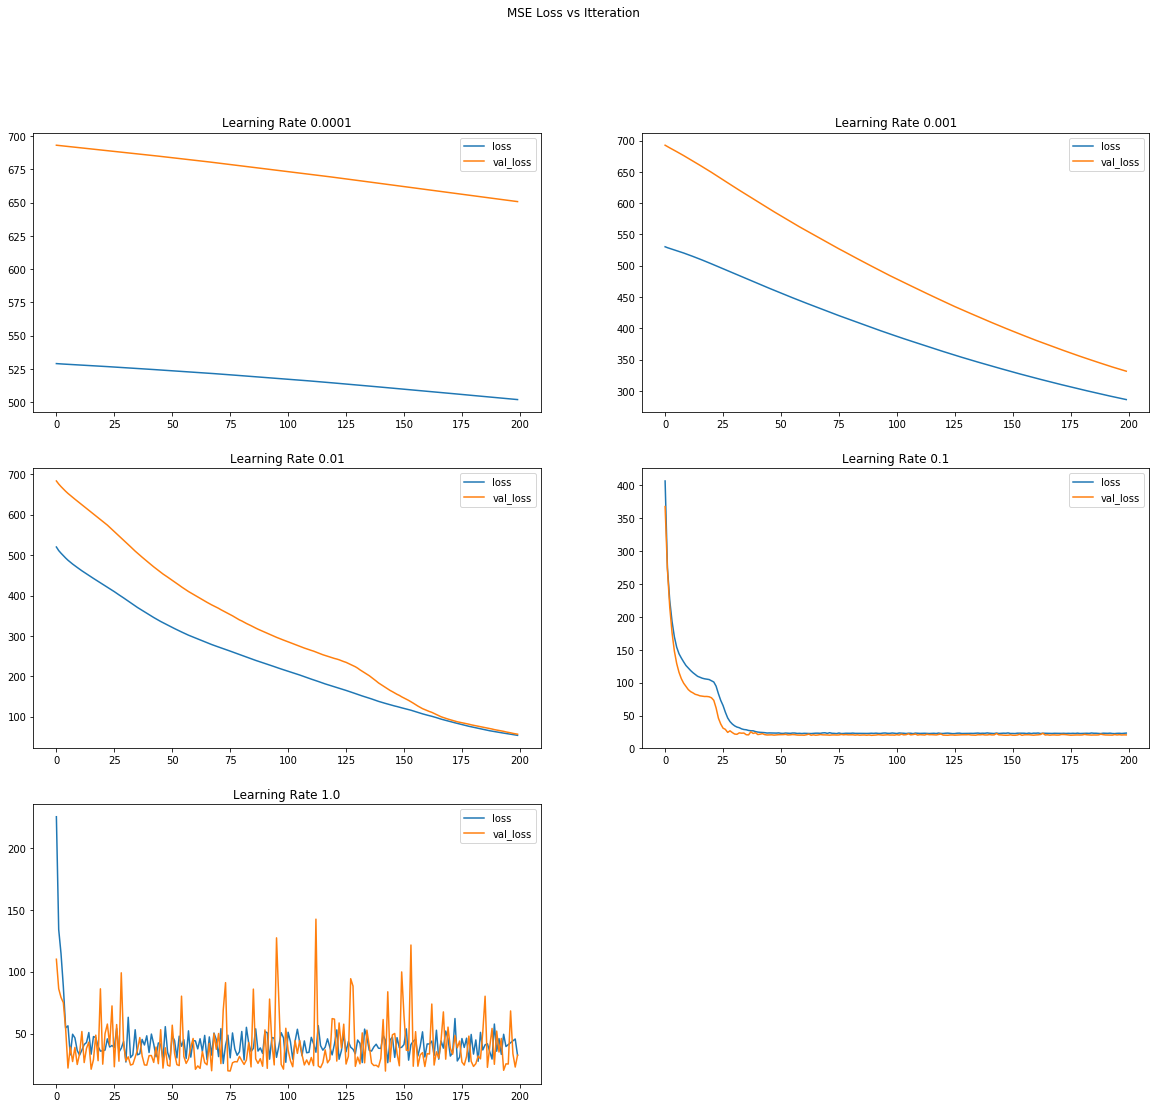

In [141]:
plot_title = lambda x: 'Learning Rate ' + str(learning_rates[x])         
lineplot_small_multiples(loss_hists, 'MSE Loss vs Iteration', plot_title,2)

Looking at the graph, learning rate of .1 after ~50 epochs seems to converge.
We can verify the point with the best score at each learning rate

In [151]:
results = []
for i in range(len(loss_hists)):
    result = {'learning_rate': learning_rates[i],
             'Best Validation Score': np.min(loss_hists[i]['val_loss']),
             'Best Validation Itteration': np.argmin(loss_hists[i]['val_loss']),
             'Best Training Score': np.min(loss_hists[i]['loss']),
             'Best Training Itteration': np.argmin(loss_hists[i]['loss'])}
    results.append(result)
results

[{'learning_rate': 0.0001,
  'Best Validation Score': 650.7667296503631,
  'Best Validation Itteration': 199,
  'Best Training Score': 501.8732271767337,
  'Best Training Itteration': 199},
 {'learning_rate': 0.001,
  'Best Validation Score': 331.5913786552322,
  'Best Validation Itteration': 199,
  'Best Training Score': 286.27124045004695,
  'Best Training Itteration': 199},
 {'learning_rate': 0.01,
  'Best Validation Score': 56.933638989085885,
  'Best Validation Itteration': 199,
  'Best Training Score': 54.07955564626957,
  'Best Training Itteration': 199},
 {'learning_rate': 0.1,
  'Best Validation Score': 20.030694142193862,
  'Best Validation Itteration': 89,
  'Best Training Score': 22.631333964452306,
  'Best Training Itteration': 107},
 {'learning_rate': 1.0,
  'Best Validation Score': 19.672573989545796,
  'Best Validation Itteration': 142,
  'Best Training Score': 25.832456474169405,
  'Best Training Itteration': 72}]

We get the best results (mse of 20) with a learning rate of .1 after 89 epochs.  The training set scores similarly, so we aren't overfitting here.

In [160]:
learning_rate = .1
model = compile_linear_model(learning_rate)
#assume 89 work on 80% of the training data, so we'll use 89/.8 itterations to train on the whole set
model.fit(xtrain.values, ytrain.values, verbose = 0, epochs = int(89/.8)+1) 
model.evaluate(xtest.values, ytest.values)

152/152 [==============================] - 0s 3ms/sample - loss: 22.6842


22.684183170920925

So we get a test score of 23.29

## Part 2: Logistic Regression

In [193]:
bc = pd.read_csv('breast-cancer.csv').drop('id',axis=1).dropna(axis = 1)

bc_train = bc.sample(frac=.7)
bc_test = bc.drop(bc_train.index)

def get_xy(data):
    train = bc_train.drop('diagnosis', axis = 1)
    regularize = lambda x: (x - train.mean())/train.std()
    y = data.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
    x = regularize(data.drop('diagnosis', axis = 1))
    return x,y.astype('int32')
bc_xtrain, bc_ytrain = get_xy(bc_train)
bc_xtest, bc_ytest = get_xy(bc_test)

In [207]:
class LogModel(tf.keras.Model):
    
    def __init__(self):
        super(LogModel, self).__init__()
        self.dense1 = layers.Dense(1, activation = tf.keras.activations.sigmoid)
        
    def call(self, inputs, training = False):
        return self.dense1(inputs)
    
def compile_log_model(lr = .001):
    model = LogModel()
    model.compile(tf.keras.optimizers.Adam(lr), loss=tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
    return model

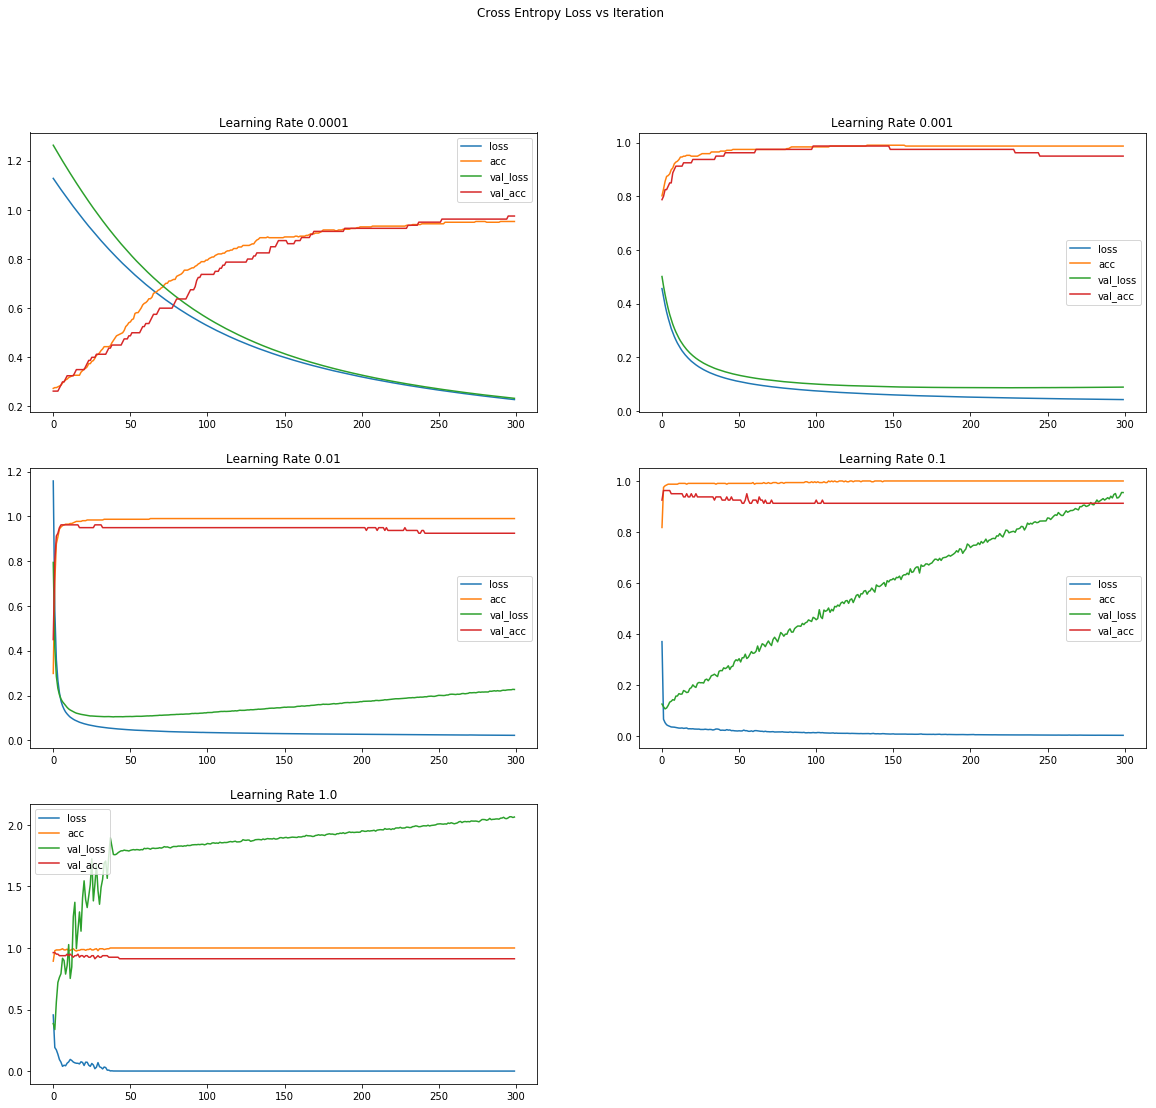

In [212]:
loss_hists = []
learning_rates = [.0001*10**k for k in range(5)]
epochs = 300
val_size = .2
fit_model = lambda m, vs: m.fit(bc_xtrain.values, 
                                bc_ytrain.values, 
                                epochs = epochs, 
                                validation_split = vs, 
                                verbose = 0)
for  lr in learning_rates:
    model = compile_log_model(lr)
    hist = fit_model(model, val_size)
    loss_hists.append(hist.history)
    
plot_title = lambda x: 'Learning Rate ' + str(learning_rates[x])         
lineplot_small_multiples(loss_hists, 'Cross Entropy Loss vs Iteration', plot_title,2)

In [213]:
results = []
for i in range(len(loss_hists)):
    result = {'learning_rate': learning_rates[i],
             'Best Validation Score': np.min(loss_hists[i]['val_loss']),
             'Best Validation Itteration': np.argmin(loss_hists[i]['val_loss']),
             'Best Training Score': np.min(loss_hists[i]['loss']),
             'Best Training Itteration': np.argmin(loss_hists[i]['loss'])}
    results.append(result)
results

[{'learning_rate': 0.0001,
  'Best Validation Score': 0.23310551643371583,
  'Best Validation Itteration': 299,
  'Best Training Score': 0.22804280300185364,
  'Best Training Itteration': 299},
 {'learning_rate': 0.001,
  'Best Validation Score': 0.0861503079533577,
  'Best Validation Itteration': 226,
  'Best Training Score': 0.04207002498068899,
  'Best Training Itteration': 299},
 {'learning_rate': 0.01,
  'Best Validation Score': 0.10466888174414635,
  'Best Validation Itteration': 39,
  'Best Training Score': 0.02216232309129628,
  'Best Training Itteration': 297},
 {'learning_rate': 0.1,
  'Best Validation Score': 0.10609589070081711,
  'Best Validation Itteration': 2,
  'Best Training Score': 0.0024614031595008084,
  'Best Training Itteration': 298},
 {'learning_rate': 1.0,
  'Best Validation Score': 0.33746522590517997,
  'Best Validation Itteration': 1,
  'Best Training Score': 9.496621785717636e-05,
  'Best Training Itteration': 299}]

So We get best results with ~226 itterations with a learning rate of .001.
Training loss is about half of what validation loss is there, so overtraining is an issue with too may st